In [10]:
# To remove the FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

sns.set_theme()

# Probabilities

### Probability space

A probability space is given by the triplet

$$
(\Omega, S, P)
$$

where 
- $\Omega$ is the outcome space and $\omega \in \Omega$ is a sample point
- $S$ is the collections of events which we are interested in. An event is $s$ $\in$ $S \subset \Omega$ 
- $P$ is the mapping of S to $\mathbb{R}$ such that it is a probability

### Axioms of probability

- $P(a) \geq 0 \forall s \in S$
- $P(\Omega) = 1$
- $a, b \in S$ and $a \cap b = \emptyset \Rightarrow P(a \cup b) = P(a) + P(b)$

### Random variables

A random variable $X$ is a function from the sample points to some range
$$
X : \Omega \rightarrow \mathbb{R}
$$

### Cumulative Distribution Function (CDF)

Let $X : \Omega \rightarrow \mathbb{R}$ then the CDF of $X$ is defined as

$$
F_X(x) = P(X \leq x)
$$

The probability of an intervall of a CDF is given by the integral over the probability density function (pdf) which is the derivative of the CDF

$$
p(x) = \frac{d}{d x} F_X(x) \Rightarrow \int_{a}^{b} p(x) dx = F_X(b) - F_X(a) = P(a < X \leq b)
$$

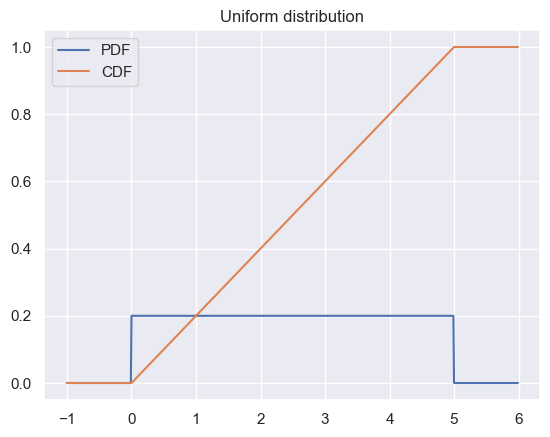

In [13]:
a = 0
b = 5
unif_pdf = lambda x : 1/(b - a) * (x > a) * (x < b)
unif_cdf = lambda x: 

x = np.arange(-1, 6, 0.01)

plt.plot(x, unif_pdf(x), label='PDF')
plt.plot(x, unif_cdf(x), label='CDF')
plt.title('Uniform distribution')
plt.legend()
plt.show()


### Boolean RV and propositional logic

A boolean RV $X$ is defined as

$$
X : \Omega \rightarrow \{true, false\}
$$ 

Together with propositional logic

- event $a$ $\Rightarrow$ Set of atomic events where $A(\omega) = true$
- event $\neg a$ $\Rightarrow$ Set of atomic events where $A(\omega) = false$
- event $a \land b$ $\Rightarrow$ Set of atomic events where $A(\omega) = true$ and $B(\omega) = true$

$$
(a \lor b) = (\neg a \land b) \lor (a \land \neg b) \lor (a \land b) 
\Rightarrow P(a \lor b) = P(\neg a \land b) + P(a \land \neg b) + P(a \land b)
$$

### Mean and Variance

The mean or expected value of a distribution for discrete variables is given by

$$
\mathbb{E}[X] = \mu = \sum_{x \in \mathcal{X}} x p(x)
$$

and for continous variables

$$
\mathbb{E}[X] = \mu = \int_{x \in \mathcal{X}} x p(x) dx
$$

The variance measures the squared spread of the distribution and is thus defined by

$$
var[X] = \sigma^2= \mathbb{E}[(X - \mu)^2] = \mathbb{E}[X^2] - \mu^2
$$

and the square root of the variance is called the square root

### Frequency interpretation

If we perform N identical random experiments for fixed $P$ then we observe the data $\mathcal{D}$ = \{x_1,...,x_n \} with this we can compute the frequency occurence of on event A:

$$
\epsilon_N (A) =  \frac{1}{N} \sum^{N}_{i=1}\delta_{x_i}(A) \quad \delta_x (A) = \mathds{1}(A)
$$
Then for a infinite repition in the frequency perspective we can say

$$
\epsilon_N (A) \xrightarrow[]{N \rightarrow \infty} P(A)
$$

### Central Limit theorem

Under normal conditions, the sum of many random variables will have an approximately normal distribution. Let $X_1, ..., X_n$ be i.i.d RV from the same distribution, with zero mean and given variance then their average tends to the normal distribution

$$
Z = \sqrt{n} \left( \frac{1}{n} \sum^n_{i=1} X_i \right)
$$

So for $n \rightarrow \infty$ for almost any distribution, Z tends to a normal distribution.

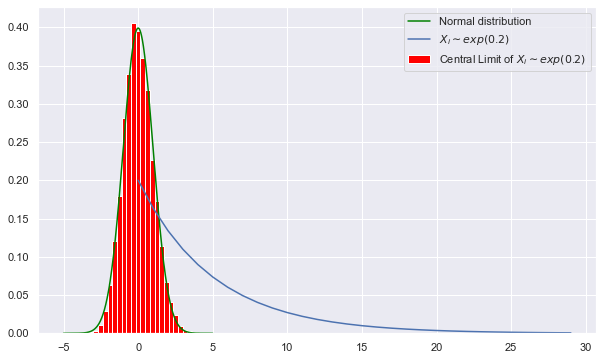

In [36]:
lam = 0.2
exponential = lambda x : lam * np.exp(- lam * x)
normal = lambda x : 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * x ** 2)

x = np.arange(0, 30)
x1 = np.arange(-5, 5, 0.01)

xl = []
for i in range(10000):
  xl.append(stats.expon.rvs(size=100).mean())

# Normalize the data
xl = np.array(xl)
xl = (xl - np.mean(xl)) / np.std(xl)

plt.figure(figsize=(10, 6))
plt.plot(x1, normal(x1), color='green', label='Normal distribution')
plt.plot(x, exponential(x), label=r'$X_i \sim exp(0.2)$')
plt.hist(xl, bins=25, density=True, color='red', label=r'Central Limit of $X_i \sim exp(0.2)$')
plt.legend()
plt.show()

### Conditional probabilities

For event A and B from $\Omega$ the conditional probability $\mathbb{P}(A|B)$ means Given B then A has probability...
For $\mathbb{P}(B) > 0$ 

$$
P(A | B) = \frac{\mathbb{P}(A \land B)}{\mathbb{P}(B)}
$$
By the chain rule it follows:

$$
\mathbb{P}(X_1, ..., X_n) = \prod_{i=1}^n \mathbb{P}(X_i | X_1, ..., X_{i-1})
$$

### Independance

We say two events A and B from $\Omega$ are independant iff

$$
\mathbb{P}(A|B) = \mathbb{P}(A) \quad \text{or} \quad \mathbb{P}(B|A) = \mathbb{P}(B) \quad \text{or} \quad \mathbb{P}(A, B) = \mathbb{P}(A) \mathbb{P}(B) 
$$

We say events are conditionally independant where an event is irrelevant when evaluating a statement

$$
\mathbb{P}(A| B, C) = \mathbb{P}(A|B)
$$

### Bayes rule

The bayes rule is given by:

$$
\mathbb{P}(B|A) = \frac{\mathbb{P}(A|B)\mathbb{P}(B)}{\mathbb{P}(A)}
$$
Here $\mathbb{P}(B|A)$ is called the posterior,  $\mathbb{P}(A|B)$ the likelihood, $\mathbb{P}(B)$ the prior and $\mathbb{P}(A)$ the evidence.

A naive Bayes model for probability calculation is

$$
\mathbb{P}(\text{Cause}, \text{effect}_1, \text{effect}_2, ...) = \mathbb{P}(\text{Cause}) \prod_i \mathbb{P}(\text{effect}_i |
\text{Cause})
$$

### Confidence intervall

#### Frequentist

Here we look at the sample mean and std of a RV, and a true mean $\mu$ which we treat as an unknown constant. Given $\bar{x} = \frac{1}{n} \sum_i x_i$:

$$
\bar{X} \sim \mathcal{N}(\mu, \bar{\sigma}^2), \quad \bar{\sigma}^2 = \frac{\sigma^2}{n} 
$$

We want to find $\mu$ for which we are 95% sure that it lies in the intervall. We center $\bar{X}$ ($Z = (\mu - \bar{X}) / \bar{\sigma}$) and calculate the upper bound, for when the integral auf it's distribution is equal to 1 - $\alpha$:

$$
\mathbb{P}(Z < h_{\alpha}) = 1 - \alpha \Leftrightarrow \mathbb{P}(\mu < \bar{X} + h_{\alpha} \bar{\sigma}) = \Phi(\bar{X} + h_{\alpha} \bar{\sigma}) =  1 - \alpha
$$

Solving this would give a value for $h_{\alpha}$ for which \mu has this probability. This intervall can be seen in the frequentist perspective as, 'when sampling n times, 1-c % of these values would lie in this range'. In the frequentist perspective we look at probabilities like a frequency of events, how frequent does one event happend compared to others which can happen at the same time.

#### Bayesian

In the bayesian we treat $\mu$ as a random variable and apply bayes theorem to find out the distribution of $\mu$:

$$
P(\mu, \bar{x}) \propto p(\bar{x}, \mu) p(\mu)
$$

Here we can choose $p(\mu)$ like we want. If we don't have any prior information, we may choose a uniform distribution, or if we do have some prior knowledge about the distribution of $\mu$ we may choose that as a prior.

If we choose $p(\mu) = \mathcal{N}(m, \nu^2)$ then we get $p(\mu | \bar{x}) = \mathcal{N}(\tilde{m}, \tilde{\nu}^2)$ with $\tilde{m} = \frac{\bar{x}/\bar{\sigma}^2 + m / \nu^2}{1/\bar{\sigma}^2 + 1/\nu^2}$ and $\tilde{\nu}^2 = \frac{1}{1/\bar{\sigma}^2 + 1/\nu^2}$

Again we want to find $\mu$ for which we are 95% sure that it lies in the intervall. We center $\bar{X}$ ($Z = (\mu - \tilde{m}) / \tilde{\nu}$) and calculate the upper bound, for when the integral auf it's distribution is equal to 1 - $\alpha$:

$$
\mathbb{P}(Z < h_{\alpha}) = 1 - \alpha \Leftrightarrow \mathbb{P}(\mu < \tilde{m} + h_{\alpha} \tilde{\nu}) = \Phi(\tilde{m} + h_{\alpha} \tilde{\nu}) =  1 - \alpha
$$

If then we have $\nu^2 \gg \bar{\sigma}^2$ then 

$$ 
\tilde{m} = \frac{\bar{x}/\bar{\sigma}^2 + m / \nu^2}{1/\bar{\sigma}^2 + 1/\nu^2} \approx \bar{x} \quad \tilde{\nu}^2 = \frac{1}{1/\bar{\sigma}^2 + 1/\nu^2} \approx \bar{\sigma}^2
$$

And also looking at the limit for $n \rightarrow \infty$ this approximation becomes exact, meaning the bayesian and frequentist are identical (often happens but not always!).